## Generating and Displaying Plots

Now, let's say that we want to display a plot to our website, which we created using Pandas.

In [1]:
# This code creates a connection to the database
from sqlalchemy import create_engine

conn_string = 'mysql://{user}:{password}@{host}/{db}?charset={encoding}'.format(
    host = 'db.ipeirotis.org', 
    user = 'student',
    db = 'citibike',
    password = 'dwdstudent2015',
    encoding = 'utf8mb4')

engine = create_engine(conn_string)
con = engine.connect()

Let's create a figure what shows how full a particular station is over time.

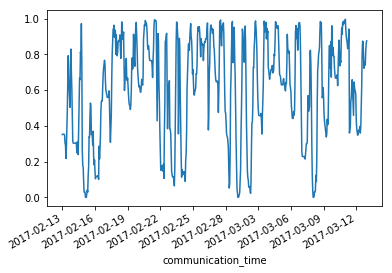

In [3]:
%matplotlib inline
import pandas as pd
station = 161 # LaGuardia Pl & W 3 St
status = pd.read_sql( "SELECT * FROM status WHERE id= %(station_id)s", params={"station_id": station},con=con)
plot = status.set_index('communication_time').percent_full.plot()

We can save the image as an image file as follows:

In [4]:
# Save the plot into the file example.png
fig = plot.get_figure()
filename = 'example.png'
fig.savefig(filename)
fig.clear()

### Displaying the image on our website

Now let's see how we can present the plot on our website. There are two steps.

1. Create a place to store and serve images. For this, we create a folder called `static` under our current folder. This is a folder that Flask will use to find and serve "_static_" files.
2. Store the plot as an image under the `static` folder.
3. Modify our HTML code to display the image.

For Step 3, modify the file `station_status.html` under `templates` and add the following code, to display the image.

```html
<img class="center-block" src="{{image}}" />
```

Then, add the following code in the `webserver.py` file:

```python
import matplotlib
matplotlib.use('Agg')
import pandas as pd
def create_plot(station,con):
    # Read the data from the database
    df = pd.read_sql( "SELECT * FROM status WHERE id= %(station_id)s", params={"station_id": station},con=con)
    # Create a plot, displaying the "percent_full" variable with "communication_time" as the x-axis
    plot = df.set_index('communication_time').percent_full.plot()
    # Store the file under the static folder, and give a name plot-<stationid>.png
    filename = 'static/plot-'+str(station)+ '.png'
    fig = plot.get_figure()
    fig.savefig(filename)
    fig.clear()
    # Return back the name of the image file
    return filename
```

and also modify the code in the code for `station_status()` to create the image, and pass the file name to the template.

```python
    image_filename = create_plot(station_id,con)
    ...
    return render_template('station_status.html', station_id = station_id, statuses=status, image=image_filename)
```
